Use absolute momentum to filter a universe of stocks, then use relative momentum to rank the stocks and take long positions in the top performers. Hold until they underperform using yahho finance

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import backtrader as bt
import datetime

class MomentumStrategy(bt.Strategy):
    params = (
        ('lookback_period', 30),
        ('num_top_performers', 3)
    )

    def __init__(self):
        self.stocks = []
        self.top_performers = []

    def next(self):
        if len(self.data) >= self.params.lookback_period:
            # Calculate absolute momentum for each stock
            for data in self.datas:
                prices = data.close.get(size=self.params.lookback_period)
                absolute_momentum = (prices[-1] / prices[0]) - 1
                if absolute_momentum > 0:
                    self.stocks.append(data)

            # Rank stocks based on relative momentum
            self.top_performers = sorted(
                self.stocks, key=lambda d: d.close[0] / d.close[-self.params.lookback_period] - 1, reverse=True
            )[:self.params.num_top_performers]

            # Take long positions in top performers
            for data in self.datas:
                if data in self.top_performers:
                    self.buy(data=data)

        # Hold until underperformance
        for data in self.datas:
            if data in self.top_performers and data.close < data.close[-self.params.lookback_period]:
                self.close(data=data)

# Universe of stocks
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define strategy parameters
lookback_period = 30
num_top_performers = 3

# Initialize and run the backtrader engine
cerebro = bt.Cerebro()

# Add each stock data to the backtrader engine
for stock in stocks:
    data = bt.feeds.PandasData(dataname=yf.download('AAPL', start='2012-01-01', end='2021-12-31'))
    cerebro.adddata(data)

# Add the MomentumStrategy to the backtrader engine
cerebro.addstrategy(MomentumStrategy, lookback_period=lookback_period, num_top_performers=num_top_performers)
# # Run the backtrader engine
# cerebro.run()
# # Plot the portfolio value
# cerebro.plot()
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name="return")
#cerebro.addanalyzer(BacktraderPlottingLive, address="*", port=8889)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
Final Portfolio Value: 20832.90


In [32]:
type(strat)

__main__.MomentumStrategy

In [33]:
import quantstats as qs

                           Strategy
-------------------------  ----------
Start Period               2012-01-03
End Period                 2021-12-30
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          108.33%
CAGR﹪                     7.62%

Sharpe                     0.69
Prob. Sharpe Ratio         98.45%
Smart Sharpe               0.66
Sortino                    1.0
Smart Sortino              0.97
Sortino/√2                 0.71
Smart Sortino/√2           0.69
Omega                      1.23

Max Drawdown               -23.41%
Longest DD Days            971
Volatility (ann.)          11.73%
Calmar                     0.33
Skew                       0.18
Kurtosis                   34.74

Expected Daily %           0.03%
Expected Monthly %         0.61%
Expected Yearly %          7.62%
Kelly Criterion            9.79%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.18%
Expected Shortfall (cVaR)  -1.18%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-09-02,2021-01-15,2021-12-30,484,-23.406551,-23.187019
2,2019-05-06,2019-08-05,2019-11-18,196,-14.523893,-13.891317
3,2014-09-03,2016-11-14,2017-05-01,971,-12.241474,-12.203205
4,2017-05-15,2019-01-03,2019-04-17,702,-10.031112,-9.956816
5,2020-02-13,2020-02-24,2020-06-10,118,-8.856967,-8.433137


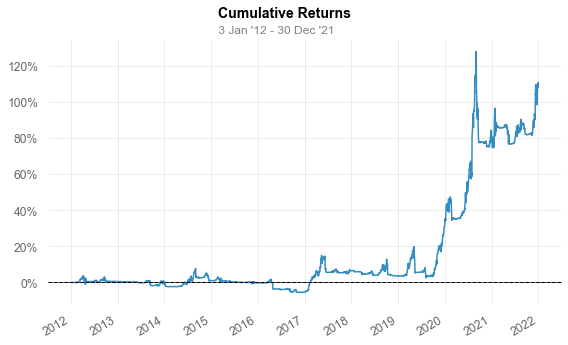

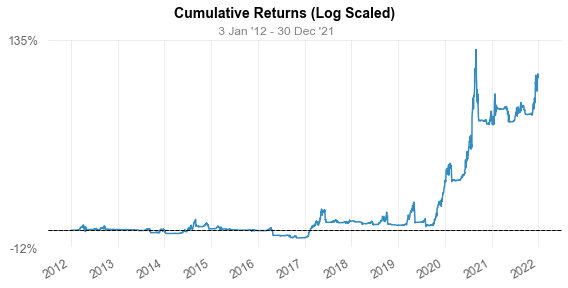

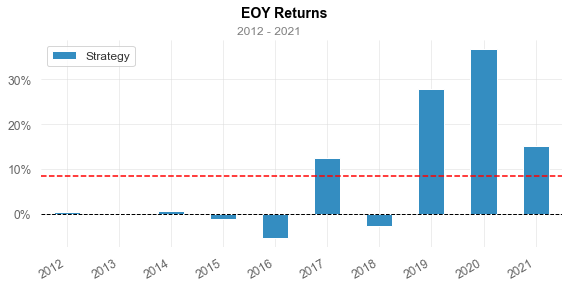

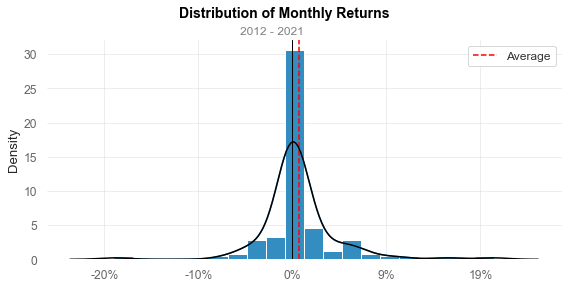

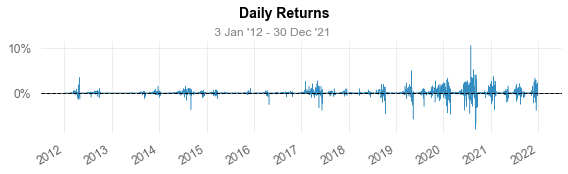

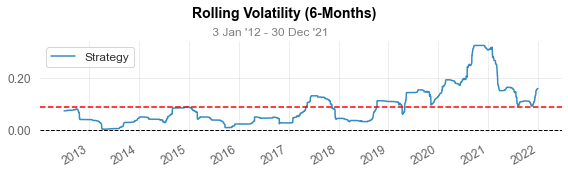

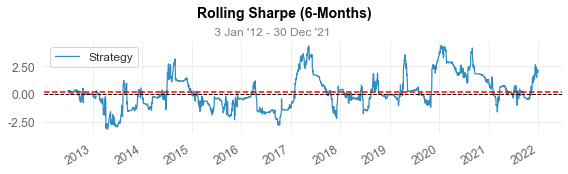

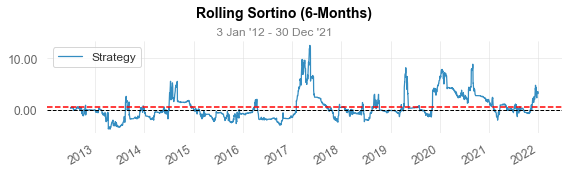

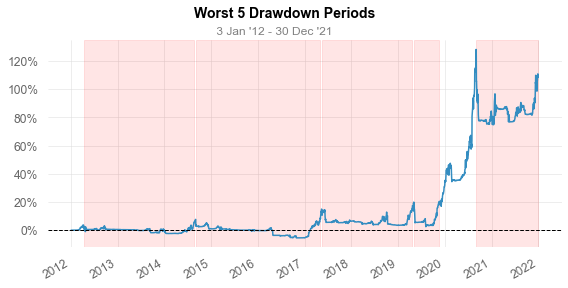

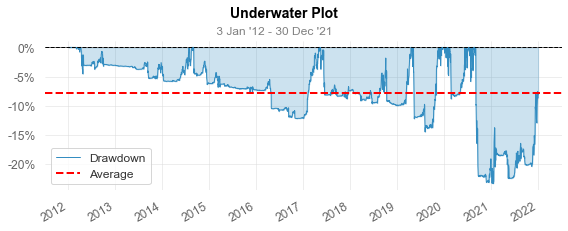

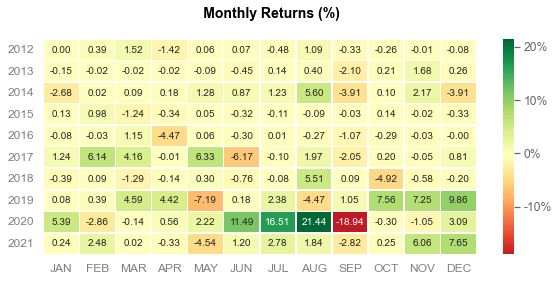

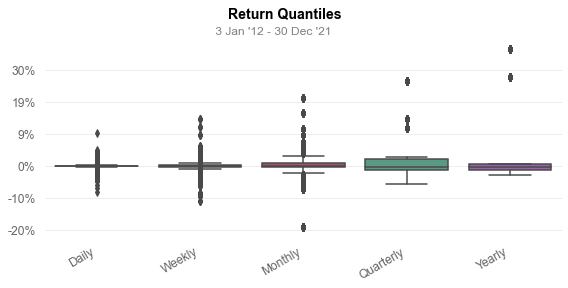

In [34]:
strat_return = strat.analyzers.getbyname("return").get_analysis()
strat_return = list(strat_return.items())
idx, values = zip(*strat_return)
strat_return = pd.Series(values, idx)
qs.reports.full(strat_return)

In [35]:
strat_return

2012-01-03    0.000000
2012-01-04    0.000000
2012-01-05    0.000000
2012-01-06    0.000000
2012-01-09    0.000000
                ...   
2021-12-23    0.003615
2021-12-27    0.022795
2021-12-28   -0.005723
2021-12-29    0.000498
2021-12-30   -0.006528
Length: 2516, dtype: float64

In [36]:
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

In [39]:
qs.stats.max_drawdown(strat_return)

-0.23406551221107041

Same Strategy using matplotlib

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


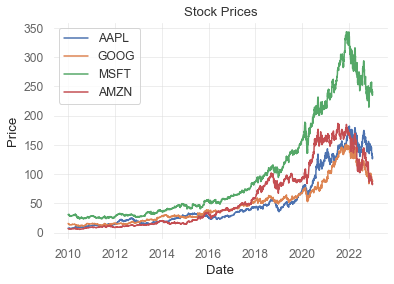

In [38]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate absolute momentum
def calculate_absolute_momentum(prices):
    return (prices[-1] / prices[0]) - 1

# Function to calculate relative momentum
def calculate_relative_momentum(prices):
    return (prices[-1] / prices[0]) - 1

# Get historical price data for a given ticker
def get_historical_prices(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Universe of stocks
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define strategy parameters
lookback_period = 30
num_top_performers = 3

# Iterate over each stock
for stock in stocks:
    # Get historical price data
    prices = get_historical_prices(stock, '2010-01-01', '2023-01-01')

    # Apply absolute momentum filter
    absolute_momentum = calculate_absolute_momentum(prices)
    if absolute_momentum <= 0:
        continue

    # Apply relative momentum ranking
    relative_momentum = calculate_relative_momentum(prices)

    # Select top performers
    top_performers = [(stock, relative_momentum)]  # Store as a tuple

    # Plot price data
    plt.plot(prices.index, prices, label=stock)

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')

# Add legend
plt.legend()

# Display the plot
plt.show()